<a href="https://colab.research.google.com/github/its-Kumar/Deep_Learning/blob/master/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digits Classification using DeepLearning 

## Importing the libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
tf.__version__

'2.3.0'

## Importing the dataset

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)

11493376/11490434 [==============================] - 0s 0us/step


60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

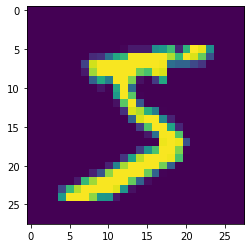

In [8]:
plt.imshow(X_train[0])

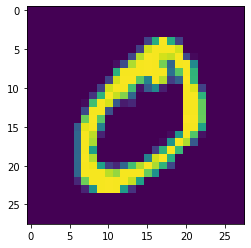

In [9]:
plt.imshow(X_train[1])

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Data Preprocessing

### Scale the data

In [17]:
X_train = X_train / 255
X_test = X_test / 255

### Flatten the data

In [22]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_train_flatten.shape

(60000, 784)

In [19]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Build Neural Network with single layer

In [20]:
model = keras.Sequential([
                          keras.layers.Dense(10,
                                             input_shape=(784,),
                                             activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(X_train_flatten,
          y_train,
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4893 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3069 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2857 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2750 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.9259


### evaluate the score

In [23]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 848us/step - loss: 0.2671 - accuracy: 0.9259


[0.26706039905548096, 0.9258999824523926]

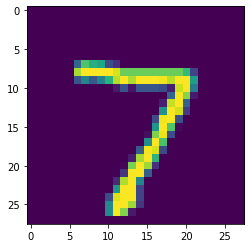

In [25]:
plt.imshow(X_test[0])

### Predict the results

In [26]:
y_pred = model.predict(X_test_flatten)
y_pred[0]

array([9.22772597e-06, 1.80502946e-10, 3.73783878e-05, 1.42450035e-02,
       1.08210770e-06, 1.20601275e-04, 9.02798780e-10, 7.23965287e-01,
       8.34013845e-05, 1.01223588e-03], dtype=float32)

In [27]:
np.argmax(y_pred[0])

7

In [28]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

In [29]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Creating the confusion matrix

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,
                         predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    6,    2,    4,    0],
       [   0, 1111,    2,    2,    0,    1,    4,    2,   13,    0],
       [   3,   10,  911,   18,    7,    4,   11,   10,   54,    4],
       [   1,    0,   13,  935,    0,   20,    1,    9,   26,    5],
       [   1,    1,    3,    1,  911,    0,   11,    4,   12,   38],
       [   7,    3,    3,   42,    9,  774,   10,    4,   34,    6],
       [   9,    3,    8,    1,    8,   16,  907,    2,    4,    0],
       [   1,   11,   22,    7,    8,    2,    0,  938,    4,   35],
       [   3,    7,    6,   20,    9,   21,    8,    7,  888,    5],
       [   8,    8,    2,   12,   22,    6,    0,   14,   13,  924]],
      dtype=int32)>

### Visualizing the confusion matrix

Text(69.0, 0.5, 'Truth')

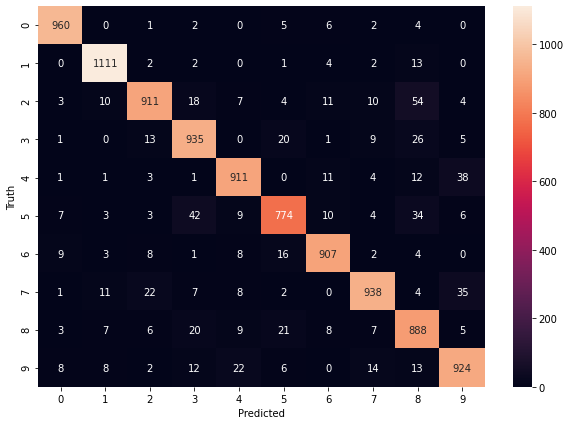

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Build the NN with a hidden layer

In [33]:
model = keras.Sequential([
                          keras.layers.Dense(100,
                                             input_shape=(784,),
                                             activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(X_train_flatten,
          y_train,
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1333 - accuracy: 0.9605
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0966 - accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0730 - accuracy: 0.9782
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0607 - accuracy: 0.9819


### Evaluate the result and predict the result

In [35]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9753


[0.0852992832660675, 0.9753000140190125]

In [36]:
y_pred = model.predict(X_test_flatten)
y_pred_label = [np.argmax(i) for i in y_pred]

### Confusion Matrix

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,
                         predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    2,    1,    5,    1,    1,    1],
       [   0, 1119,    3,    0,    0,    1,    2,    1,    9,    0],
       [   7,    0, 1001,    5,    4,    0,    2,    5,    8,    0],
       [   0,    0,    5,  985,    1,    5,    0,    3,    6,    5],
       [   1,    0,    4,    0,  969,    0,    1,    2,    1,    4],
       [   3,    1,    0,    9,    3,  858,    6,    1,    8,    3],
       [   4,    3,    1,    1,    2,    3,  941,    0,    3,    0],
       [   1,    4,   10,    4,    3,    0,    0,  998,    1,    7],
       [   4,    0,    1,    5,    8,    2,    3,    4,  942,    5],
       [   3,    2,    0,    4,   18,    2,    0,    3,    3,  974]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

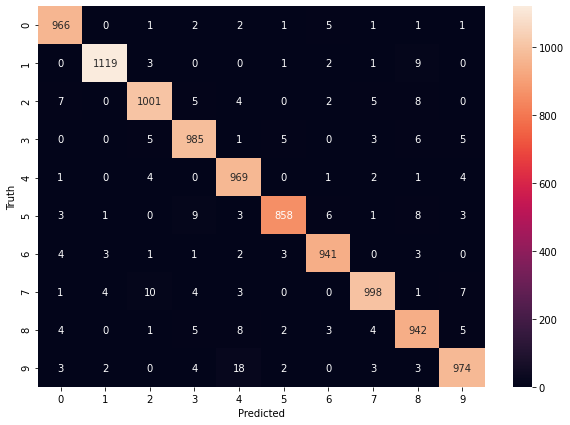

In [38]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Build the model with Flatten Layer

Don't need to flatten the data seprately.

In [39]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(X_train, y_train,
          epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2897 - accuracy: 0.9191
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1356 - accuracy: 0.9610
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0972 - accuracy: 0.9714
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0760 - accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0617 - accuracy: 0.9811


### Evaluate the result and predict the result

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9725


[0.09111672639846802, 0.9725000262260437]

In [41]:
y_pred = model.predict(X_test)

In [46]:
y_pred_label = [np.argmax(i) for i in y_pred]

### Confusion Matrix

In [48]:
cm = tf.math.confusion_matrix(labels=y_test,
                         predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    2,    1,    1,    2,    2,    0,    1,    0],
       [   0, 1122,    3,    1,    0,    1,    2,    2,    4,    0],
       [   6,    0, 1001,    2,    3,    1,    2,   11,    6,    0],
       [   0,    0,    5,  990,    1,    1,    0,    6,    3,    4],
       [   2,    0,    2,    0,  960,    0,    5,    2,    0,   11],
       [   5,    1,    0,   18,    1,  857,    5,    1,    2,    2],
       [   8,    3,    3,    1,    4,    3,  932,    0,    4,    0],
       [   1,    2,    9,    2,    0,    0,    0, 1011,    0,    3],
       [   9,    2,    1,   11,    7,    5,    4,   11,  921,    3],
       [   6,    3,    1,    6,   15,    3,    0,   14,    0,  961]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

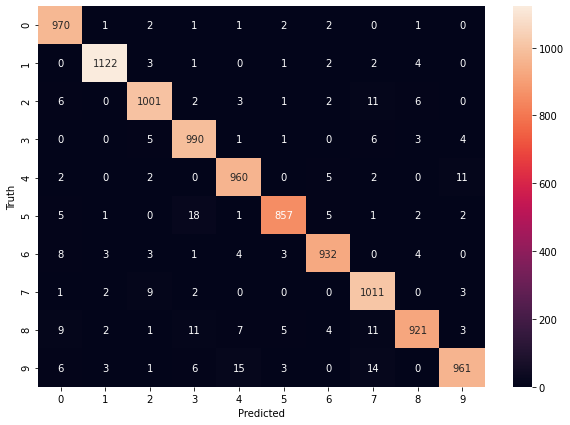

In [49]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')